### Posos Test Sample
This program will first import the data, doing some clean up and data preparation. Then, the text data will be represented numerically and split into training and testing sets. The results of logistic regression model will be assessed on F1 score and precision and recall. At the end, the model is saved (pickled) for later use in micro service.

#### Import libraries

In [2]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#### Data preparation

In [20]:
df_neg = pd.read_csv(r'data\negative_examples_posology.csv')
df_neg

,Unnamed: 0,0
0,1,ne 06/05/1995
1,3,centre dimagerie medicale pavillon
2,5,"78,75eur"
3,6,lundi 9h00/18h00
4,8,59100 roubaix
...,...,...
1452,2587,personne recevant les soins (la ligne nom et p...
1453,2590,identification du pharmacien ou du fouruisseur...
1454,2591,|dispensation du 21/04/2021 a 12h43m30s
1455,2595,"pointe a pitre, le 12/04/2021"


In [22]:
first_column = df_neg.columns[0]
first_column

'Unnamed: 0'

In [24]:
df_neg=df_neg.drop(first_column, axis=1)
df_neg

,0
0,ne 06/05/1995
1,centre dimagerie medicale pavillon
2,"78,75eur"
3,lundi 9h00/18h00
4,59100 roubaix
...,...
1452,personne recevant les soins (la ligne nom et p...
1453,identification du pharmacien ou du fouruisseur...
1454,|dispensation du 21/04/2021 a 12h43m30s
1455,"pointe a pitre, le 12/04/2021"


In [26]:
df_neg = df_neg.rename(columns=({'0':'text'}))
df_neg

,text
0,ne 06/05/1995
1,centre dimagerie medicale pavillon
2,"78,75eur"
3,lundi 9h00/18h00
4,59100 roubaix
...,...
1452,personne recevant les soins (la ligne nom et p...
1453,identification du pharmacien ou du fouruisseur...
1454,|dispensation du 21/04/2021 a 12h43m30s
1455,"pointe a pitre, le 12/04/2021"


In [29]:
df_neg["label"] = 0
df_neg

,text,label
0,ne 06/05/1995,0
1,centre dimagerie medicale pavillon,0
2,"78,75eur",0
3,lundi 9h00/18h00,0
4,59100 roubaix,0
...,...,...
1452,personne recevant les soins (la ligne nom et p...,0
1453,identification du pharmacien ou du fouruisseur...,0
1454,|dispensation du 21/04/2021 a 12h43m30s,0
1455,"pointe a pitre, le 12/04/2021",0


In [32]:
df_pos = pd.read_csv (r'data\positive_examples_posology.csv')
df_pos

,Unnamed: 0,0
0,0,corgard 40 mg 1 comprimé le matin et le soir
1,1,peau atopique
2,2,quantité suffisante pour 14j
3,3,prendre 1/2 comprime toutes les 8 heures
4,4,19 kggraduation 1 a 4 fois par jour selon beso...
...,...,...
491,491,quantité suffisante pour 3 mois
492,492,1/ jour pendant 3 mois
493,493,1 comprime i fois par jourau meme moment de la...
494,494,etre pris en une prise unique le soir


In [33]:
first_column = df_pos.columns[0]
first_column
df_pos=df_pos.drop(first_column, axis=1)
df_pos
df_pos = df_pos.rename(columns=({'0':'text'}))
df_pos
df_pos["label"] = 1
df_pos

,text,label
0,corgard 40 mg 1 comprimé le matin et le soir,1
1,peau atopique,1
2,quantité suffisante pour 14j,1
3,prendre 1/2 comprime toutes les 8 heures,1
4,19 kggraduation 1 a 4 fois par jour selon beso...,1
...,...,...
491,quantité suffisante pour 3 mois,1
492,1/ jour pendant 3 mois,1
493,1 comprime i fois par jourau meme moment de la...,1
494,etre pris en une prise unique le soir,1


In [38]:
df = pd.merge(df_neg, df_pos,how='outer')
df

,text,label
0,ne 06/05/1995,0
1,centre dimagerie medicale pavillon,0
2,"78,75eur",0
3,lundi 9h00/18h00,0
4,59100 roubaix,0
...,...,...
1948,quantité suffisante pour 3 mois,1
1949,1/ jour pendant 3 mois,1
1950,1 comprime i fois par jourau meme moment de la...,1
1951,etre pris en une prise unique le soir,1


In [43]:
df_neg['label'].value_counts()

0    1457
Name: label, dtype: int64

In [44]:
df_pos['label'].value_counts()

1    496
Name: label, dtype: int64

#### Data preprocessing

##### Vectorizing data

In [4]:
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=20)
x = vectorizer.fit_transform(df['text'].values.astype('U'))
y = df['label']

##### Data split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##### Training the ML model

In [6]:
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

##### Testing the ML Model

In [9]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       299
           1       0.90      0.77      0.83        92

    accuracy                           0.93       391
   macro avg       0.92      0.87      0.89       391
weighted avg       0.92      0.93      0.92       391



d:\Programmes\Programmation\Codage\Anaconda\3\envs\PytorchCuda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


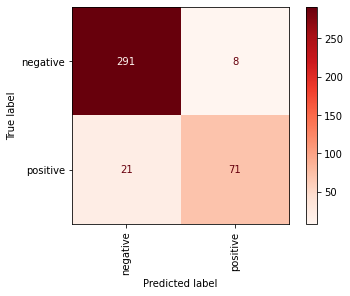

In [7]:
cm=plot_confusion_matrix(model, x_test, y_test, display_labels=['negative', 'positive'], cmap='Reds', xticks_rotation='vertical')
cm.figure_.savefig('conf_ma_lr.png',dpi=300)

##### Testing the model on a unseen text

In [66]:
text = 'prends un seul fois'
result = model.predict_proba(vectorizer.transform([text]))[0][1]
if result > 0.5:
    print ("positive")
else:
    print("negative")

positive


In [ ]:
text = 'prends un seul'
result = model.predict_proba(vectorizer.transform([text]))[0][1]
if result > 0.5:
    print ("positive")
else:
    print("negative")

##### ML saving model

In [67]:
pickle.dump(model, open('model_lr.pkl', 'wb'))

##### ML loading model

In [ ]:
pickled_model = pickle.load(open('model_lr.pkl', 'rb'))